# Assignment 1 Machine Learning

NIM              : 2602063913

NAME             : Bernardus Ignasio

CLASS            : LA01

Assignment Number: 1

## Exploratory Data Analysis (EDA)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Mengambil data dari dataset kaggle
data= pd.read_csv("listings.csv", encoding='UTF-8')

### Descriptive analysis

In [5]:
#melihat data teratas dataset
data.head()

id                                 name  host_id  host_name  \
0  49091    COZICOMFORT LONG TERM STAY ROOM 2   266763  Francesca   
1  50646      Pleasant Room along Bukit Timah   227796    Sujatha   
2  56334                          COZICOMFORT   266763  Francesca   
3  71609  Ensuite Room (Room 1 & 2) near EXPO   367042    Belinda   
4  71896      B&B  Room 1 near Airport & EXPO   367042    Belinda   

  neighbourhood_group neighbourhood  latitude  longitude     room_type  price  \
0        North Region     Woodlands   1.44255  103.79580  Private room     83   
1      Central Region   Bukit Timah   1.33235  103.78521  Private room     81   
2        North Region     Woodlands   1.44246  103.79667  Private room     69   
3         East Region      Tampines   1.34541  103.95712  Private room    206   
4         East Region      Tampines   1.34567  103.95963  Private room     94   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0             180                  1  2013-10-21               0.01   
1              90                 18  2014-12-26               0.28   
2               6                 20  2015-10-01               0.20   
3               1                 14  2019-08-11               0.15   
4               1                 22  2019-07-28               0.22   

   calculated_host_listings_count  availability_365  
0                               2               365  
1                               1               365  
2                               2               365  
3                               9               353  
4                               9               355

In [6]:
print(data.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


#### Didapatkan bahwa dataset berisi data perincian airbnb di singapore mulai dari kepemilikan, alamat, review, spesifikasi, dsb

In [7]:
#Melihat info tipe data & cek data NULL
print(data.info())
print()
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7907 non-null   int64  
 1   name                            7905 non-null   object 
 2   host_id                         7907 non-null   int64  
 3   host_name                       7907 non-null   object 
 4   neighbourhood_group             7907 non-null   object 
 5   neighbourhood                   7907 non-null   object 
 6   latitude                        7907 non-null   float64
 7   longitude                       7907 non-null   float64
 8   room_type                       7907 non-null   object 
 9   price                           7907 non-null   int64  
 10  minimum_nights                  7907 non-null   int64  
 11  number_of_reviews               7907 non-null   int64  
 12  last_review                     51

#### Didapatkan bahwa terdapat tipe data float, int, object & terdapat kolom dengan nilai NULL berupa kolom name, last_review, dan reviews_per_month

In [8]:
data.describe()

id       host_id     latitude    longitude         price  \
count  7.907000e+03  7.907000e+03  7907.000000  7907.000000   7907.000000   
mean   2.338862e+07  9.114481e+07     1.314192   103.848787    169.332996   
std    1.016416e+07  8.190910e+07     0.030577     0.043675    340.187599   
min    4.909100e+04  2.366600e+04     1.243870   103.646560      0.000000   
25%    1.582180e+07  2.305808e+07     1.295795   103.835825     65.000000   
50%    2.470627e+07  6.344891e+07     1.311030   103.849410    124.000000   
75%    3.234850e+07  1.553811e+08     1.322110   103.872535    199.000000   
max    3.811276e+07  2.885676e+08     1.454590   103.973420  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count     7907.000000        7907.000000        5149.000000   
mean        17.510054          12.807386           1.043669   
std         42.094616          29.707746           1.285851   
min          1.000000           0.000000           0.010000   
25%          1.000000           0.000000           0.180000   
50%          3.000000           2.000000           0.550000   
75%         10.000000          10.000000           1.370000   
max       1000.000000         323.000000          13.000000   

       calculated_host_listings_count  availability_365  
count                     7907.000000       7907.000000  
mean                        40.607689        208.726318  
std                         65.135253        146.120034  
min                          1.000000          0.000000  
25%                          2.000000         54.000000  
50%                          9.000000        260.000000  
75%                         48.000000        355.000000  
max                        274.000000        365.000000

In [9]:
numerical= list(data.select_dtypes(["int64","float64","int8"]).columns)
categorical= list(data.select_dtypes(['object']).columns)

print(f'Numerical Features: \n{numerical}')
print()
print(f'Categorical Features: \n{categorical}')

Numerical Features: 
['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

Categorical Features: 
['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']


In [10]:
area=data['neighbourhood'].value_counts()
region=data['neighbourhood_group'].value_counts()
room=data['room_type'].value_counts()

print("Neighbourhood category")
print(region)
print()
print("Neighbourhood_Group category")
print(area)
print()
print("Room Type category")
print(room)

Neighbourhood category
neighbourhood_group
Central Region       6309
West Region           540
East Region           508
North-East Region     346
North Region          204
Name: count, dtype: int64

Neighbourhood_Group category
neighbourhood
Kallang                    1043
Geylang                     994
Novena                      537
Rochor                      536
Outram                      477
Bukit Merah                 470
Downtown Core               428
Bedok                       373
River Valley                362
Queenstown                  266
Tanglin                     210
Singapore River             175
Marine Parade               171
Jurong West                 153
Orchard                     136
Newton                      134
Bukit Timah                 131
Jurong East                 118
Hougang                     109
Clementi                    102
Toa Payoh                   101
Pasir Ris                    71
Serangoon                    69
Sengkang             

#### Teridentifikasi data categorical dan numerical

### Identification of distribution and patterns

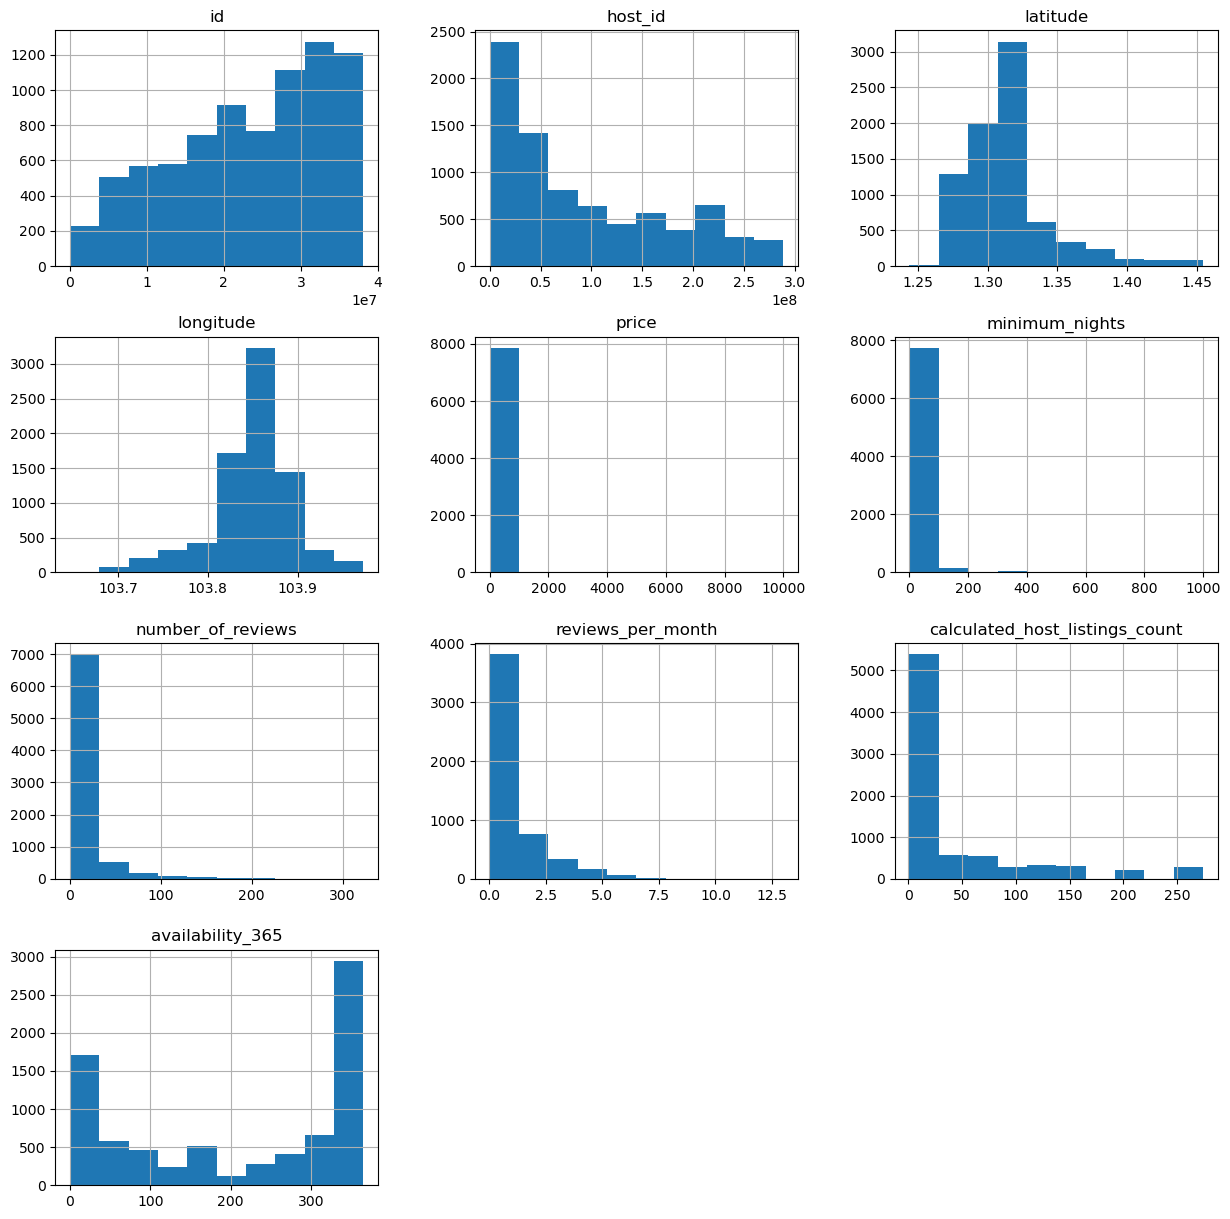

In [11]:
data.hist(figsize=(15,15))
plt.show()

In [12]:
#seharusnya memakai bar chart namun warnanya tidak terlihat, maka saya memakai histogram (Hasilnya tetap sama)
roomtype=px.histogram(data,x='room_type', title='Distribution of Room Type', color="neighbourhood_group")
roomtype.show()

areas=px.histogram(data,x='neighbourhood',title='Distribution of Neighbourhood', color="neighbourhood_group")
areas.show()

reg=px.histogram(data,x='neighbourhood_group' ,title='Distribution of Neighbourhood Group', color="room_type")
reg.show()

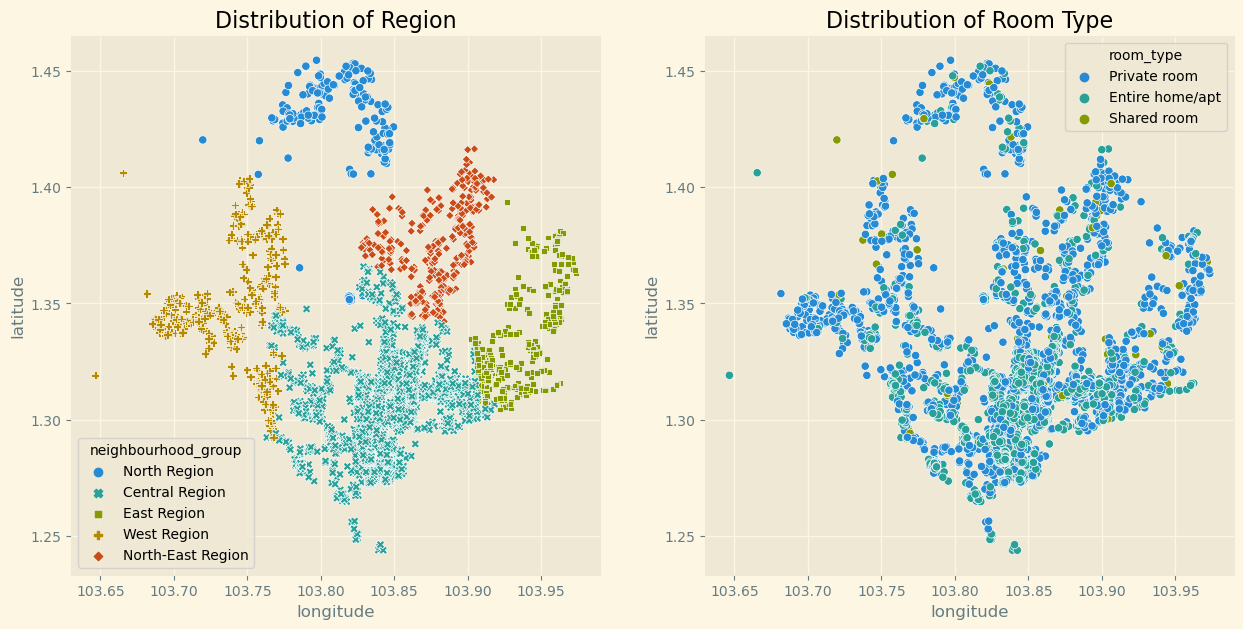

In [13]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.scatterplot(data, x='longitude', y='latitude', hue='neighbourhood_group', style='neighbourhood_group')
plt.title("Distribution of Region")
plt.subplot(1,2,2)
sns.scatterplot(data,x='longitude', y='latitude', hue='room_type')
plt.title("Distribution of Room Type")


plt.show()

#### Dari Identifikasi distribusi data categorical, terlihat bahwa mayoritas room type adalah entire home/apt dan persebaran lokasinya tidak merata, berpusat di central region
#### Terlihat pada scatter plot bahwa ilustrasi peta airbnb singapura, dominasi airbnb terletak pada central region, dan mayoritas tipe roomnya adalah entire home/apt diikuti private room

### Patterns
1. Dari numerical histogram, terlihat bahwa terdapat pola berupa:
- Price mayoritas berkisar di angka 0-1000
- Minimum night mayoritas berkisar antara 0-100, namun terdapat juga up to 365
- jumlah review mayoritas <100
- jumlah review perbulan mayoritas <2 orang
- Availability airbnb mayoritas available sepanjang tahun, ataupun hanya beberapa hari dalam setahun (<100 days)

2. Dari categorical histogram, terlihat bahwa terdapat pola berupa:
- Airbnb mayoritas berupa entire home/apt(jumlah>4000) dan juga private room(jumlah>3000) sedangkan sedikit berupa shared room
- mayoritas Airbnb terletak pada central region dengan kallang dan geylang sebagai daerah terbanyak airbnb 
- Pada region North, East, West, dan North-East mayoritas Airbnb bertipe private room
- Mayoritas host memiliki 1-4 airbnb

### Visualizing Data & Interesting Insight
#### Relationship between numerical features

In [14]:
compare1=px.scatter(data, x='price',y='availability_365', trendline='ols')
compare1.show()
compare2=px.scatter(data, x='price',y='minimum_nights', trendline='ols')
compare2.show()
compare3=px.scatter(data, x='price',y='number_of_reviews', trendline='ols')
compare3.show()

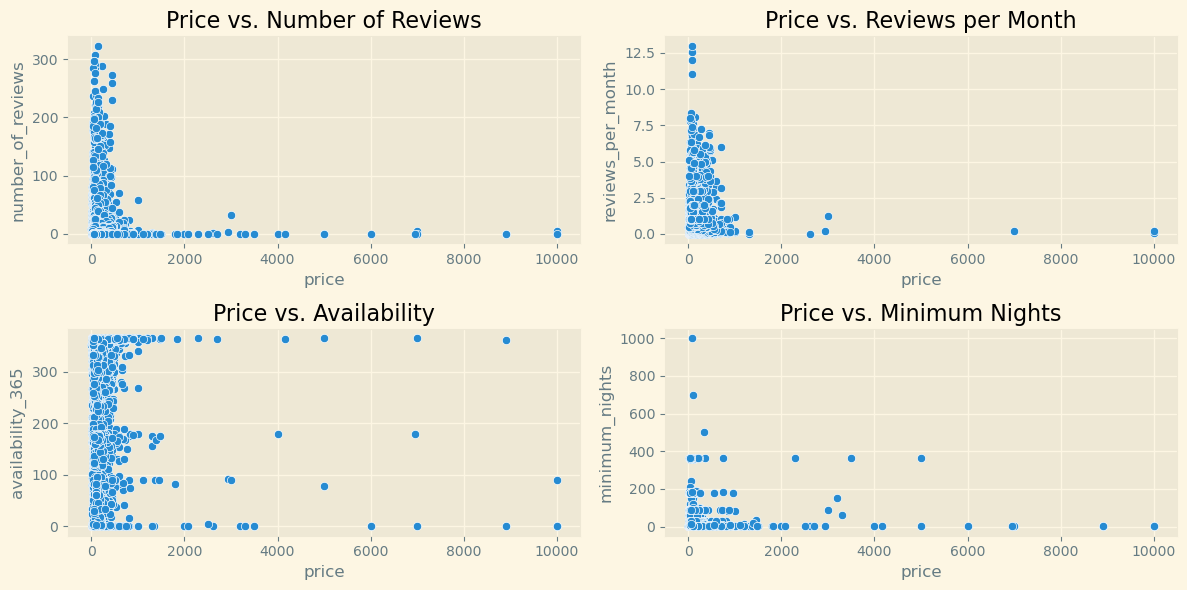

In [15]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.scatterplot(x='price', y='number_of_reviews', data=data)
plt.title('Price vs. Number of Reviews')

plt.subplot(2, 2, 2)
sns.scatterplot(x='price', y='reviews_per_month', data=data)
plt.title('Price vs. Reviews per Month')

plt.subplot(2, 2, 3)
sns.scatterplot(x='price', y='availability_365', data=data)
plt.title('Price vs. Availability')

plt.subplot(2, 2, 4)
sns.scatterplot(x='price', y='minimum_nights', data=data)
plt.title('Price vs. Minimum Nights')

plt.tight_layout()
plt.show()

#### Melalui scatterplot dapat dilihat bahwa harga yang lebih murah menunjukkan review yang lebih banyak, dan availability yang lebih tinggi & beragam, serta minimum nights yang cenderung sedikit lebih banyak.

dapat ditarik konklusi bahwa harga merupakan aspek independen yang memiliki dependency berupa review, availability dan minimum nights

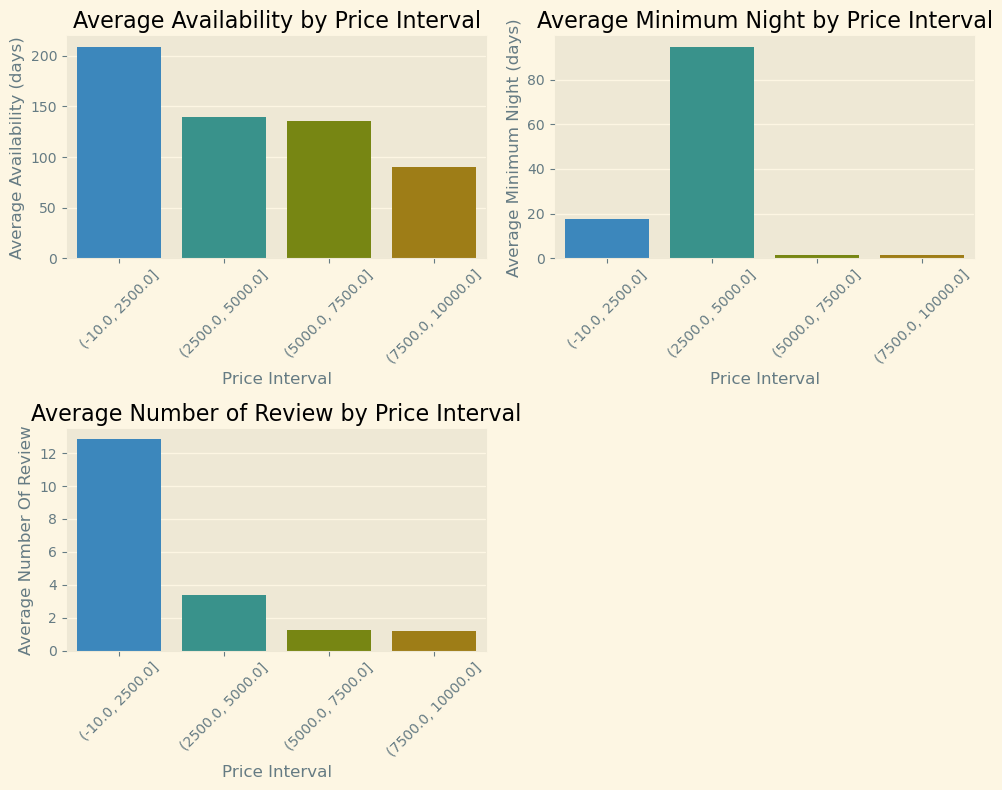

In [16]:
priceintv=pd.cut(data['price'], bins=4)
plt.figure(figsize=(10, 8))

avgavailable=data.groupby(priceintv)['availability_365'].mean()
dataavg=pd.DataFrame({'price': avgavailable.index ,'avgavail_365': avgavailable.values})
plt.subplot(2,2,1)
sns.barplot(x='price',y='avgavail_365', data=dataavg)
plt.title('Average Availability by Price Interval')
plt.xlabel('Price Interval')
plt.ylabel('Average Availability (days)')
plt.xticks(rotation=45)

avgmin=data.groupby(priceintv)['minimum_nights'].mean()
datamin=pd.DataFrame({'price': avgmin.index,'avgnight':avgmin.values})
plt.subplot(2,2,2)
sns.barplot(x='price',y='avgnight', data=datamin)
plt.title('Average Minimum Night by Price Interval')
plt.xlabel('Price Interval')
plt.ylabel('Average Minimum Night (days)')
plt.xticks(rotation=45)

avgreview=data.groupby(priceintv)['number_of_reviews'].mean()
datarvw=pd.DataFrame({'price': avgreview.index, 'avgreview': avgreview.values})
plt.subplot(2,2,3)
sns.barplot(x='price',y='avgreview', data=datarvw)
plt.title('Average Number of Review by Price Interval')
plt.xlabel('Price Interval')
plt.ylabel('Average Number Of Review')
plt.xticks(rotation=45)
  
plt.tight_layout()
plt.show()

#### Membuktika scatter plot bahwa terdapat dependency antara price sebagai independen value dan availability, minimum night, dan review sebagai dependen value.
-Terlihat dari grafik jika semakin tinggi harga airbnb maka availability dan reviewnya akan semakin sedikit. begitu pula pada minimum night, cenderung akan lebih sedikit

#### Relationship between categorical & numerical features

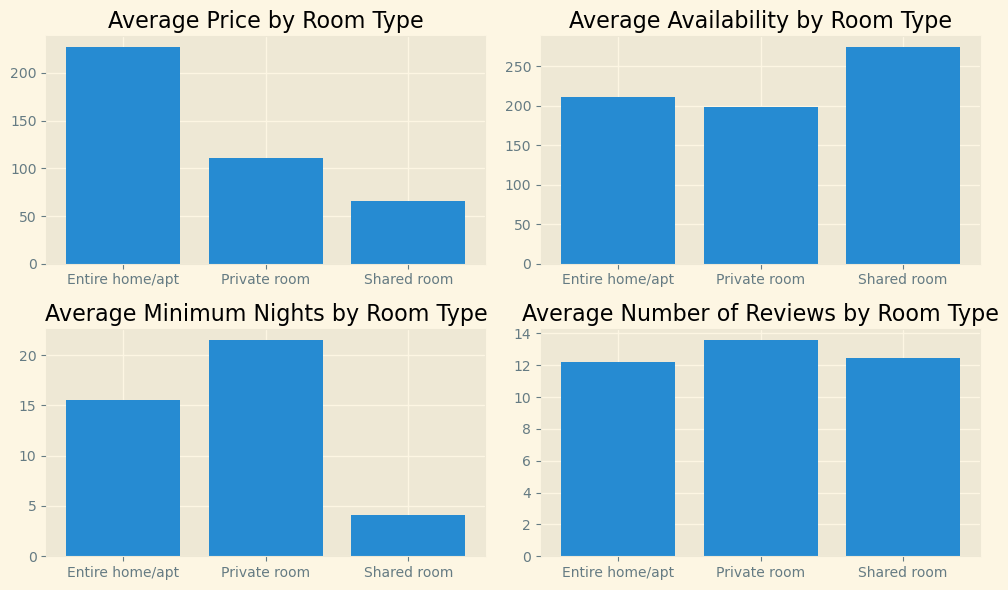

In [17]:
plt.figure(figsize=(10, 6))

plt.subplot(2,2,1)
priceroomtype = data.groupby('room_type')['price'].mean().reset_index()
plt.bar(priceroomtype['room_type'], priceroomtype['price'])
plt.title('Average Price by Room Type')

plt.subplot(2,2,2)
availroomtype = data.groupby('room_type')['availability_365'].mean().reset_index()
plt.bar(availroomtype['room_type'], availroomtype['availability_365'])
plt.title('Average Availability by Room Type')

plt.subplot(2,2,3)
mnightroomtype = data.groupby('room_type')['minimum_nights'].mean().reset_index()
plt.bar(mnightroomtype['room_type'], mnightroomtype['minimum_nights'])
plt.title('Average Minimum Nights by Room Type')

plt.subplot(2,2,4)
revroomtype = data.groupby('room_type')['number_of_reviews'].mean().reset_index()
plt.bar(revroomtype['room_type'], revroomtype['number_of_reviews'])
plt.title('Average Number of Reviews by Room Type')

plt.tight_layout()
plt.show()

#### Melalui bar chart rata2 aspek dependen terhadap room type sebagai independen value, didapatkan bahwa
- rerata harga berbanding lurus dengan tipe room (semakin besar semakin mahal (shared<private<entire))
- rerata availability juga sebanding dengan minimum nights (availability tinggi, dengan minimum nights rendah ataupun sebaliknya) dikarenakan dengan sewa yang sebentar maka airbnb akan memiliki availability lebih lama
- rerata banyaknya jumlah review hampir sebanding menunjukan bahwa peminat antara ketiga room type hampir setara jumlahnya
####
- Entire home: high price, middle demand
- Private room: middle lower price, high demand
- Shared room: low price, middle demand

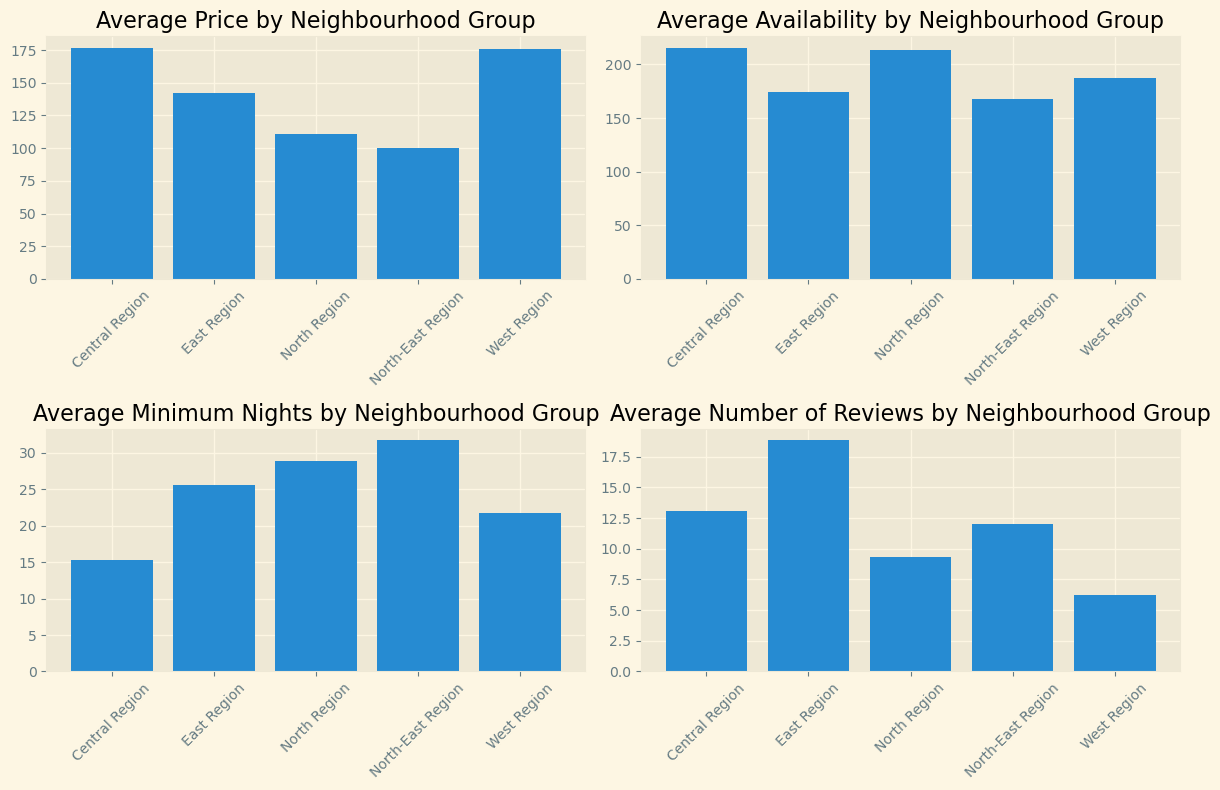

In [18]:
plt.figure(figsize=(12, 8))

plt.subplot(2,2,1)
priceregion = data.groupby('neighbourhood_group')['price'].mean().reset_index()
plt.bar(priceregion['neighbourhood_group'], priceregion['price'])
plt.title('Average Price by Neighbourhood Group')
plt.xticks(rotation=45)

plt.subplot(2,2,2)
availregion = data.groupby('neighbourhood_group')['availability_365'].mean().reset_index()
plt.bar(availregion['neighbourhood_group'], availregion['availability_365'])
plt.title('Average Availability by Neighbourhood Group')
plt.xticks(rotation=45)

plt.subplot(2,2,3)
mnightregion = data.groupby('neighbourhood_group')['minimum_nights'].mean().reset_index()
plt.bar(mnightregion['neighbourhood_group'], mnightregion['minimum_nights'])
plt.title('Average Minimum Nights by Neighbourhood Group')
plt.xticks(rotation=45)

plt.subplot(2,2,4)
revregion = data.groupby('neighbourhood_group')['number_of_reviews'].mean().reset_index()
plt.bar(revregion['neighbourhood_group'], revregion['number_of_reviews'])
plt.title('Average Number of Reviews by Neighbourhood Group')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### Terlihat bahwa
- rerata Central region memiliki price tinggi, dengan availability tinggi dengan minimum nights yang rendah dengan jumlah review menengah (high cost, low/moderate demand)
- rerata east region memiliki uppermiddle price, dengan availability dan minimum nights menengah, namun jumlah review tinggi (moderate cost, high demand)
- rerata north region memiliki middle price, dengan availability dan minimum nights tinggi, namun jumlah reviewnya lowermiddle (moderate cost, low demand)
- rerata northeast region memiliki price rendah, dengan availability terendah, minimum nights tertinggi, dan jumlah review menengah (low cost, moderate demand)
- rerata west region memiliki price tinggi, dengan availability uppermiddle, minimum nights menengah, dan jumlah review terendah (high cost, low demand)

#### Dapat ditarik kesimpulan bahwa meskipun central region menjadi daerah termahal & terbanyak jumlah airbnb, dilihat dari rerata diatas, diprediksi bahwa semakin ke timur (east & northeast), meskipun jumlah airbnb tidak banyak pemerataan demand airbnb lebih tinggi dan harga lebih terjangkau (setiap airbnb memiliki banyak review)

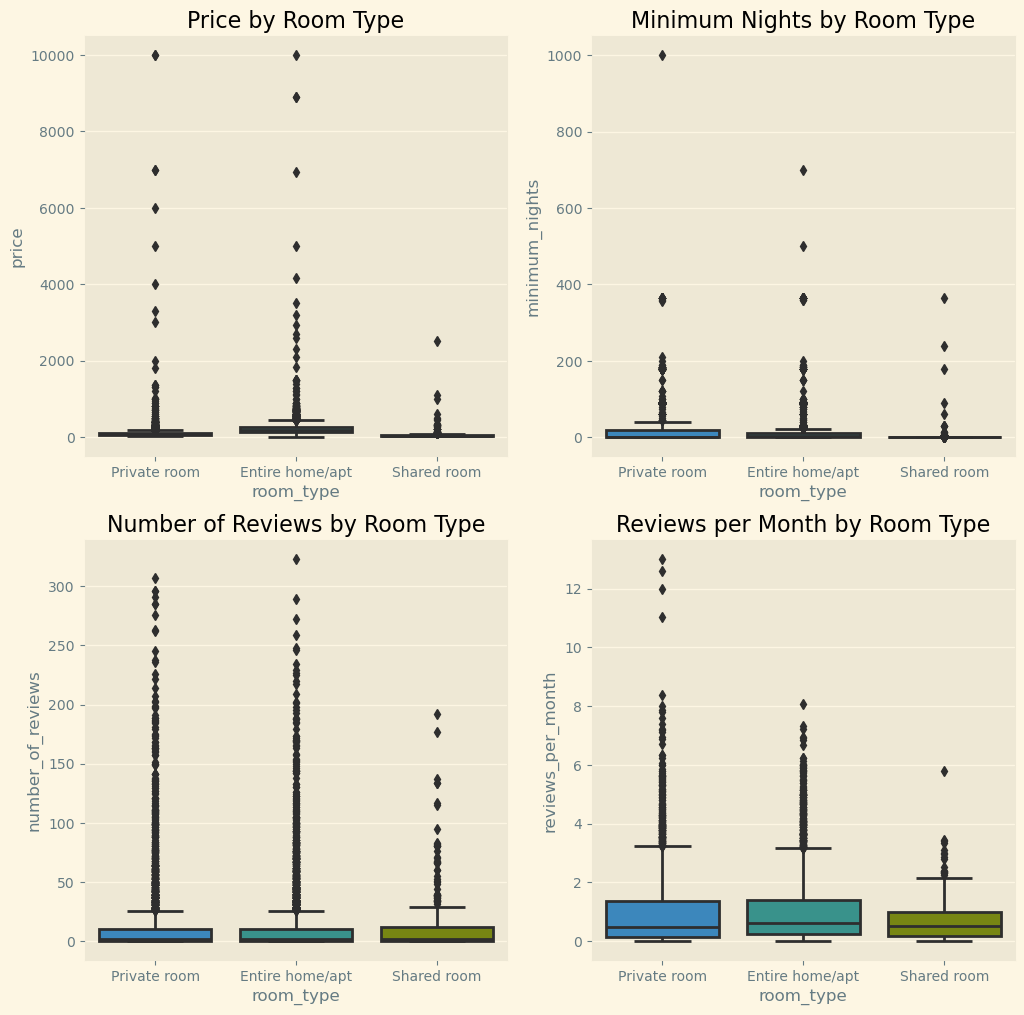

In [19]:
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
sns.boxplot(x='room_type', y='price', data=data)
plt.title('Price by Room Type')

plt.subplot(2, 2, 2)
sns.boxplot(x='room_type', y='minimum_nights', data=data)
plt.title('Minimum Nights by Room Type')

plt.subplot(2, 2, 3)
sns.boxplot(x='room_type', y='number_of_reviews', data=data)
plt.title('Number of Reviews by Room Type')

plt.subplot(2, 2, 4)
sns.boxplot(x='room_type', y='reviews_per_month', data=data)
plt.title('Reviews per Month by Room Type')

plt.show()

#### Melalui boxplot dapat dilihat bahwa jumlah outliers dari data sangat banyak, sehingga diperlukan data preprocessing

## Data Preprocessing

### NULL Handling

In [20]:
print(data.isnull().sum())

id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                     0
dtype: int64


#### Name, last review and reviews per month punya null value

In [21]:
data[data['name'].isna()]

id name   host_id host_name neighbourhood_group neighbourhood  \
1024   9436273  NaN  41240585    Audrey      Central Region   Bukit Merah   
1331  11573500  NaN  61163169  Educator      Central Region        Bishan   

      latitude  longitude     room_type  price  minimum_nights  \
1024   1.29108  103.83077  Private room     69               2   
1331   1.35221  103.85148  Private room    650               1   

      number_of_reviews last_review  reviews_per_month  \
1024                  4  2015-12-13               0.09   
1331                  0         NaN                NaN   

      calculated_host_listings_count  availability_365  
1024                               1                 0  
1331                               1                 0

#### missing airbnb name punya  host_name yang berbeda, serta dicheck bahwa calculated_host_listings_count hanya 1 sehingga tidak ada property lain yang dapat dilihat sebagai pattern,  sehingga missing name akan diberikan nama NN (No name) agar tidak menduplikat airbnb lain

In [22]:
data['name'].fillna('NN', inplace=True)
print(data.isnull().sum())

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                     0
dtype: int64


#### Null Value pada name berhasil di handling

In [23]:
data[data['last_review'].isna()].head()

id                                             name  host_id  \
18  355955  Double room in an Authentic Peranakan Shophouse  1759905   
23  481789               Master Bedroom in Newly Built Flat  2386154   
26  642660               BEST CITY LIVING WITH GA RESIDENCE  3212572   
28  719944              HDB housing in prime area near town  3648224   
29  733863                            Homestay at Serangoon  3824517   

   host_name neighbourhood_group neighbourhood  latitude  longitude  \
18    Aresha      Central Region       Geylang   1.31420  103.90232   
23     Susan         East Region      Tampines   1.34816  103.93238   
26     Roger      Central Region        Rochor   1.30109  103.85234   
28    Audrey      Central Region    Queenstown   1.30901  103.79639   
29  Shirlnet   North-East Region     Serangoon   1.36743  103.87288   

       room_type  price  minimum_nights  number_of_reviews last_review  \
18  Private room     81              90                  0         NaN   
23  Private room     37             180                  0         NaN   
26  Private room    167             180                  0         NaN   
28   Shared room    208               1                  0         NaN   
29  Private room     26             180                  0         NaN   

    reviews_per_month  calculated_host_listings_count  availability_365  
18                NaN                               1               173  
23                NaN                               1               365  
26                NaN                               1               365  
28                NaN                               1                 0  
29                NaN                               1               365

In [24]:
data[data['reviews_per_month'].isna()].head()

id                                             name  host_id  \
18  355955  Double room in an Authentic Peranakan Shophouse  1759905   
23  481789               Master Bedroom in Newly Built Flat  2386154   
26  642660               BEST CITY LIVING WITH GA RESIDENCE  3212572   
28  719944              HDB housing in prime area near town  3648224   
29  733863                            Homestay at Serangoon  3824517   

   host_name neighbourhood_group neighbourhood  latitude  longitude  \
18    Aresha      Central Region       Geylang   1.31420  103.90232   
23     Susan         East Region      Tampines   1.34816  103.93238   
26     Roger      Central Region        Rochor   1.30109  103.85234   
28    Audrey      Central Region    Queenstown   1.30901  103.79639   
29  Shirlnet   North-East Region     Serangoon   1.36743  103.87288   

       room_type  price  minimum_nights  number_of_reviews last_review  \
18  Private room     81              90                  0         NaN   
23  Private room     37             180                  0         NaN   
26  Private room    167             180                  0         NaN   
28   Shared room    208               1                  0         NaN   
29  Private room     26             180                  0         NaN   

    reviews_per_month  calculated_host_listings_count  availability_365  
18                NaN                               1               173  
23                NaN                               1               365  
26                NaN                               1               365  
28                NaN                               1                 0  
29                NaN                               1               365

#### Null Value pada last_review dan reviews_per_month memiliki dependency kepada number_of_review. Null Value terjadi jika tidak pernah ada review pada airbnb tersebut, maka null value akan diganti menjadi 0 

In [25]:
data['last_review'].fillna(0, inplace=True)
data['reviews_per_month'].fillna(0, inplace=True)
print(data.isnull().sum())

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


#### Null Values berhasil di handling

### Encoding Categorical Features

In [26]:
from sklearn.preprocessing import LabelEncoder as LE
labelencode=LE()
data['room_type']=labelencode.fit_transform(data['room_type'])
data['neighbourhood_group']=labelencode.fit_transform(data['neighbourhood_group'])
data.head()

id                                 name  host_id  host_name  \
0  49091    COZICOMFORT LONG TERM STAY ROOM 2   266763  Francesca   
1  50646      Pleasant Room along Bukit Timah   227796    Sujatha   
2  56334                          COZICOMFORT   266763  Francesca   
3  71609  Ensuite Room (Room 1 & 2) near EXPO   367042    Belinda   
4  71896      B&B  Room 1 near Airport & EXPO   367042    Belinda   

   neighbourhood_group neighbourhood  latitude  longitude  room_type  price  \
0                    2     Woodlands   1.44255  103.79580          1     83   
1                    0   Bukit Timah   1.33235  103.78521          1     81   
2                    2     Woodlands   1.44246  103.79667          1     69   
3                    1      Tampines   1.34541  103.95712          1    206   
4                    1      Tampines   1.34567  103.95963          1     94   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0             180                  1  2013-10-21               0.01   
1              90                 18  2014-12-26               0.28   
2               6                 20  2015-10-01               0.20   
3               1                 14  2019-08-11               0.15   
4               1                 22  2019-07-28               0.22   

   calculated_host_listings_count  availability_365  
0                               2               365  
1                               1               365  
2                               2               365  
3                               9               353  
4                               9               355

#### Label Encoding dilakukan pada neighbourhood_group dan room type agar visualisasi tetap dapat dilakukan dengan 

#### keterangan nomor sebagai berikut

#### Room type:
- 0= Entire home/apt
- 1= Private room
- 2= Shared room

#### Neighbourhood_group:
- 0= Central Region
- 1= East Region
- 2= North Region
- 3= North East Region
- 4= West Region

tidak dilakukan encoding pada neighbourhood karena kategori data terlalu banyak sehingga memakan memori

### Normalizate/Standarize

In [27]:
from sklearn.preprocessing import StandardScaler as ss
import numpy as np
def data_preprocessing_pipeline(data):
    numeric=['price','minimum_nights', "availability_365", 'number_of_reviews','reviews_per_month']
    categoric=data.select_dtypes(include=['object']).columns
    
    data[numeric]=data[numeric].fillna(data[numeric].mean())
    
    for feature in numeric:
        q1=data[feature].quantile(0.25)
        q3=data[feature].quantile(0.75)
        iqr=q3-q1
        lowerbound=q1-(1.5*iqr)
        upperbound=q3+(1.5*iqr)
        data[feature]=np.where((data[feature]<lowerbound)|(data[feature]>upperbound),data[feature].mean(),data[feature])
    
    scaler=ss()
    scaledata=scaler.fit_transform(data[numeric])
    data[numeric]=scaler.transform(data[numeric])
    
    data[categoric]=data[categoric].fillna(data[categoric].mode().iloc[0])
    return data

In [28]:
data_preprocessing_pipeline(data)

id                                               name    host_id  \
0        49091                  COZICOMFORT LONG TERM STAY ROOM 2     266763   
1        50646                    Pleasant Room along Bukit Timah     227796   
2        56334                                        COZICOMFORT     266763   
3        71609                Ensuite Room (Room 1 & 2) near EXPO     367042   
4        71896                    B&B  Room 1 near Airport & EXPO     367042   
...        ...                                                ...        ...   
7902  38105126  Loft 2 pax near Haw Par / Pasir Panjang. Free ...  278109833   
7903  38108273                         3bedroom luxury at Orchard  238891646   
7904  38109336    [ Farrer Park ] New City Fringe CBD Mins to MRT  281448565   
7905  38110493          Cheap Master Room in Central of Singapore  243835202   
7906  38112762  Amazing room with private bathroom walk to Orc...   28788520   

      host_name  neighbourhood_group neighbourhood  latitude  longitude  \
0     Francesca                    2     Woodlands   1.44255  103.79580   
1       Sujatha                    0   Bukit Timah   1.33235  103.78521   
2     Francesca                    2     Woodlands   1.44246  103.79667   
3       Belinda                    1      Tampines   1.34541  103.95712   
4       Belinda                    1      Tampines   1.34567  103.95963   
...         ...                  ...           ...       ...        ...   
7902      Belle                    0    Queenstown   1.27973  103.78751   
7903       Neha                    0       Tanglin   1.29269  103.82623   
7904      Mindy                    0       Kallang   1.31286  103.85996   
7905      Huang                    0  River Valley   1.29543  103.83801   
7906    Terence                    0  River Valley   1.29672  103.83325   

      room_type     price  minimum_nights  number_of_reviews last_review  \
0             1 -0.635985        1.716421          -0.636852  2013-10-21   
1             1 -0.659632        1.716421           2.090748  2014-12-26   
2             1 -0.801516       -0.046681           2.411643  2015-10-01   
3             1  0.818319       -0.812577           1.448960  2019-08-11   
4             1 -0.505926       -0.812577           2.732537  2019-07-28   
...         ...       ...             ...                ...         ...   
7902          0 -0.434984       -0.506219          -0.797299           0   
7903          0  0.384783       -0.046681          -0.797299           0   
7904          1 -0.931576        1.716421          -0.797299           0   
7905          1 -0.955223        1.178753          -0.797299           0   
7906          1 -0.848810        1.716421          -0.797299           0   

      reviews_per_month  calculated_host_listings_count  availability_365  
0             -0.777694                               2          1.069556  
1             -0.225722                               1          1.069556  
2             -0.389269                               2          1.069556  
3             -0.491486                               9          0.987427  
4             -0.348382                               9          1.001115  
...                 ...                             ...               ...  
7902          -0.798138                              31         -1.011057  
7903          -0.798138                              34          1.069556  
7904          -0.798138                               3         -0.244515  
7905          -0.798138                               2         -1.223225  
7906          -0.798138                               7          1.069556  

[7907 rows x 16 columns]

#### Dilakukan metode pipeline dalam menstandarisasi data. 
Digunakannya metode pipeline ini dikarenakan metodenya lebih clean, mudah digunakan dan menggunakan sedikit code, dikarenakan terjadi dalam 1 function. Null values di handling, data di manage agar data outlier dapat dihilangkan, dan dilakukan scaling pada data sehingga data dapat terstandarisasi dengan baik